# Advent of Code 2021
## [Day 17: Trick Shot](https://adventofcode.com/2021/day/17)

#### Load Data

In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np

In [2]:
import aocd
inputs = aocd.get_data(year=2021, day=17).split('\n')
inputs

['target area: x=288..330, y=-96..-50']

In [3]:
x0, xn = 288, 330
y0, yn = -96, -50
trench = (x0, xn, y0, yn)

### Part 1

In [4]:
def step(x, y, dx, dy):
    x += dx
    y += dy
    if dx > 0:
        dx -= 1
    elif dx < 0:
        dx += 1
    dy -= 1
    return (x, y, dx, dy)
step(0, 0, 6, 9)

(6, 9, 5, 8)

In [5]:
def iterate_steps(dx, dy, num_steps=20):
    x_frames = [0]
    y_frames = [0]
    for _ in range(num_steps):
        x, y, dx, dy = step(x_frames[-1], y_frames[-1], dx, dy)
        x_frames.append(x)
        y_frames.append(y)
    
    return np.array(x_frames), np.array(y_frames)

iterate_steps(7, 2)

(array([ 0,  7, 13, 18, 22, 25, 27, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28,
        28, 28, 28, 28]),
 array([   0,    2,    3,    3,    2,    0,   -3,   -7,  -12,  -18,  -25,
         -33,  -42,  -52,  -63,  -75,  -88, -102, -117, -133, -150]))

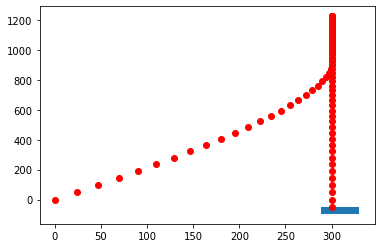

In [6]:
x, y = iterate_steps(24, 49, 100)

fig, ax = plt.subplots()
ax.add_patch(Rectangle((x0, y0), xn-x0, yn-y0))
ax.plot(x, y, 'ro')
plt.show()

In [7]:
np.any((y > y0) & (y < yn))

False

In [8]:
for dy in range(90, 110):
    x, y = iterate_steps(24, dy, 1000)
    print(dy, np.any((y >= y0) & (y <= yn)))

90 True
91 True
92 True
93 True
94 True
95 True
96 False
97 False
98 False
99 False
100 False
101 False
102 False
103 False
104 False
105 False
106 False
107 False
108 False
109 False


#### Part 1 Answer
Find the initial velocity that causes the probe to reach the highest y position and still eventually be within the target area after any step.  
**What is the highest y position it reaches on this trajectory?**

In [9]:
x, y = iterate_steps(24, 95, 200)
y.max()

4560

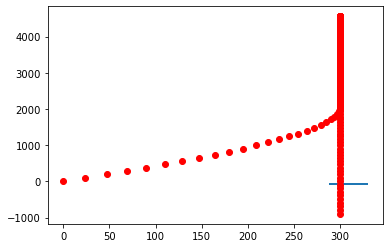

In [10]:
fig, ax = plt.subplots()
ax.add_patch(Rectangle((x0, y0), xn-x0, yn-y0))
ax.plot(x, y, 'ro')
plt.show()

### Part 2

In [11]:
def could_pass_trench(x, y, dx, dy, trench):
    x0, xn, y0, yn = trench
    if (dx >= 0 and xn < x):
        return False
    if (dx <= 0 and x0 > x):
        return False
    if (dy < 0 and y0 > y):
        return False
    return True
could_pass_trench(0,0, 6, 9, (x0, xn, y0, yn))

True

In [12]:
def iterate_steps(dx, dy, trench):
    x_frames = [0]
    y_frames = [0]
    while could_pass_trench(x_frames[-1], y_frames[-1], dx, dy, trench):
        x, y, dx, dy = step(x_frames[-1], y_frames[-1], dx, dy)
        x_frames.append(x)
        y_frames.append(y)
    
    return np.array(x_frames), np.array(y_frames)

iterate_steps(7, 2, (x0, xn, y0, yn))

(array([ 0,  7, 13, 18, 22, 25, 27, 28]),
 array([ 0,  2,  3,  3,  2,  0, -3, -7]))

In [13]:
def does_pass_trench(dx, dy, trench):
    x, y = iterate_steps(dx, dy, trench)
    return np.any((y >= y0) & (y <= yn) & (x >= x0) & (x <= xn))
does_pass_trench(24, 100, (x0, xn, y0, yn))

False

#### Part 2 Answer
**How many distinct initial velocity values cause the probe to be within the target area after any step?**

In [14]:
matches = []
for dx in range(xn+1):
    for dy in range(-96, 1000):
        if does_pass_trench(dx, dy, (x0, xn, y0, yn)):
            matches.append((dx, dy))
len(matches)

3344

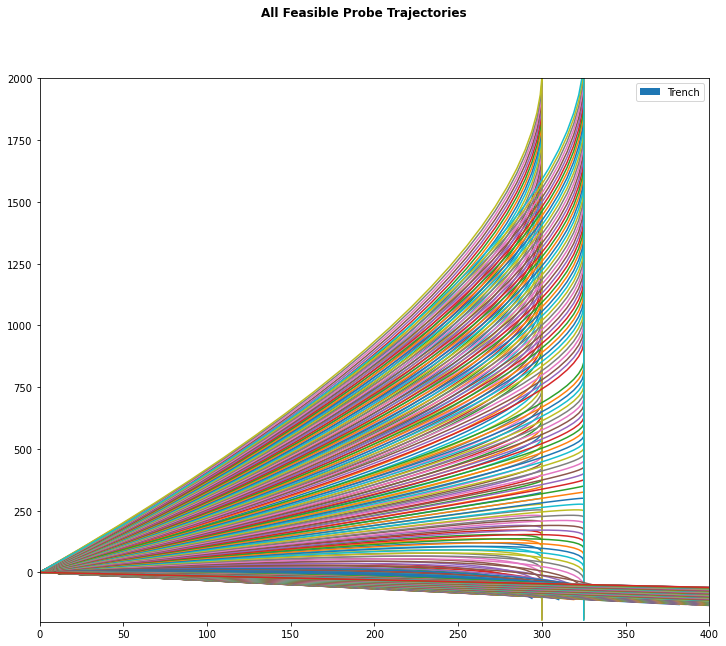

In [15]:
fig, ax = plt.subplots(figsize=(12, 10))
plt.suptitle("All Feasible Probe Trajectories", fontweight='bold')
plt.xlim([0, 400])
plt.ylim([-200, 2000])
for match in matches:
    dx, dy = match
    x, y = iterate_steps(dx, dy, trench)
    ax.plot(x, y)
ax.add_patch(Rectangle((x0, y0), xn-x0, yn-y0, label="Trench"))
plt.legend()
plt.show()

In [16]:
matches_24 = []
for dx in range(24, 26):
    for dy in range(-96, 1000):
        if does_pass_trench(dx, dy, (x0, xn, y0, yn)):
            matches_24.append((dx, dy))

fig, ax = plt.subplots(figsize=(12, 10))
plt.suptitle("'Trick Shot' Probe Trajectories", fontweight='bold')
plt.xlim([0, 400])
plt.ylim([-200, 2000])
for match in matches_24:
    dx, dy = match
    x, y = iterate_steps(dx, dy, trench)
    ax.plot(x, y)
ax.add_patch(Rectangle((x0, y0), xn-x0, yn-y0, label="Trench"))
ax.annotate("Trench", (xn, yn), (xn+30, yn+100), arrowprops={"arrowstyle":'->'})
ax.annotate("Max y = 4560", (290, 2000), (200, 1600), arrowprops={"arrowstyle":'->'})
fig.savefig('trick-shots.png', transparent=False)
plt.close()

![trick-shots.png](trick-shots.png)